<a href="https://colab.research.google.com/github/mrguzman209/github-demo/blob/main/Final_EDA_and_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction in Ames, Iowa


## Section 1: Problem Statement

**Problem Statement:** The crux of this project revolves around predicting the final sales price of residential homes in Ames, Iowa. This is based on a dataset comprising 79 explanatory variables, each providing unique insights into the various aspects of the properties. The challenge lies in effectively harnessing this diverse range of data to achieve an accurate estimation of the homes' final price. The problem's complexity requires a sophisticated approach, utilizing advanced regression techniques and creative feature engineering to estimate sales prices accurately.

**Justification for Proposed Approach:** Our proposed solution includes applying regression methods such as Random Forest and Gradient Boosting. This approach's justification lies in the complexity and multi-dimensionality of the dataset. These regression methods can capture intricate structures of the data by constructing a multitude of decision trees and optimizing loss functions, respectively. Therefore, they are particularly well-suited to handling the breadth of variables included in our dataset. The efficiency of our approach will be gauged using the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price, offering a reliable metric for the accuracy of our predictions.

**Dataset Overview:** We employ the Ames Housing dataset for this project, compiled by Dean De Cock as a comprehensive and modernized data resource. It includes 79 variables that reflect various characteristics of the houses sold, such as dwelling type, zoning classification, lot size, and road access, along with details about the sales such as sale type, condition, and the date of the sale. The Train and Test datasets each contain 1,460 rows, offering a robust amount of data for our analysis. This dataset, central to a current competition held on Kaggle.com, is a testament to its relevance and reliability for our task (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description).

## Section 2: Data understanding (EDA)
This section will provide a graphical and non-graphical representation of relationships between the response variable and predictor variables.


### Load and review the dataset


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pandas.api.types import CategoricalDtype
import seaborn as sns
sns.set_theme() # Apply the seaborn theme

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers

# Misc

from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


import datetime

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
#warnings.filterwarnings("ignore", category=LinAlgWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore")




Mounted at /content/drive


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view

#Train CSV
downloaded = drive.CreateFile({'id':'1d2FKPGgasxOLItCMFm7TXw7TtiUBykqq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')

#Test CSV
downloaded = drive.CreateFile({'id':'1_eNXlHAluHC3DlZKegEjZZTQ3PXby18Z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')


The training dataset has 1460 rows of data with an Id column, 79 feature columns, and a target column called SalesPrice.

In [ ]:
# read the application_test.csv
# import into the dataframe
df_train = pd.read_csv('train.csv')
# confirm the data is imported
df_train.head()

shape = df_train.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

Shape of the dataframe (row, col): (1460, 81) 



Similarly, the test dataset has 1459 rows of data with an Id column and 79 feature columns. We do not have the target column for it.

In [ ]:
# read the application_test.csv
# import into the dataframe
df_test = pd.read_csv('test.csv')
# confirm the data is imported
df_test.head()

shape = df_test.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

Shape of the dataframe (row, col): (1459, 80) 



Then, we merge the two datasets together, so we can process them at the same time.

In [ ]:
# Merge the datasets
df = pd.concat([df_train, df_test])
shape = df.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

Shape of the dataframe (row, col): (2919, 81) 



### Review target column (SalePrice)

The target column SalePrice has a mean of $180K and is clearly skewed to the right with quite a few outliers on the right-side of the distribution. We will be applying transformation techniques to this column later in the report to better prepare this column for our machine learning models.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


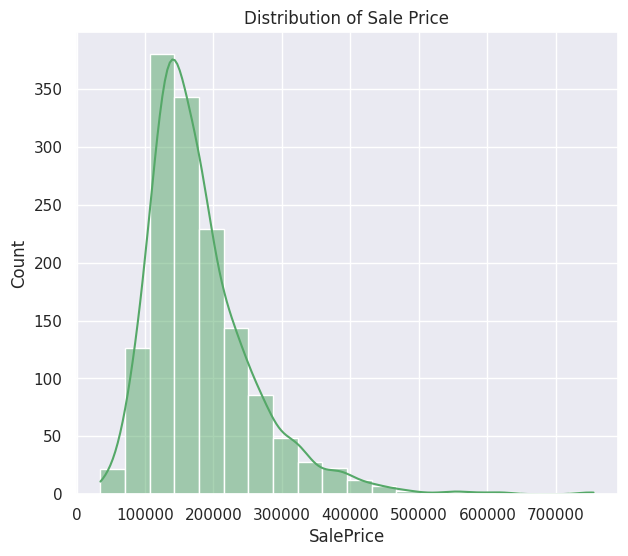

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(7, 6))
sns.histplot(df['SalePrice'], bins=20, kde=True, color='g')
plt.title(f'Distribution of Sale Price')
plt.show()

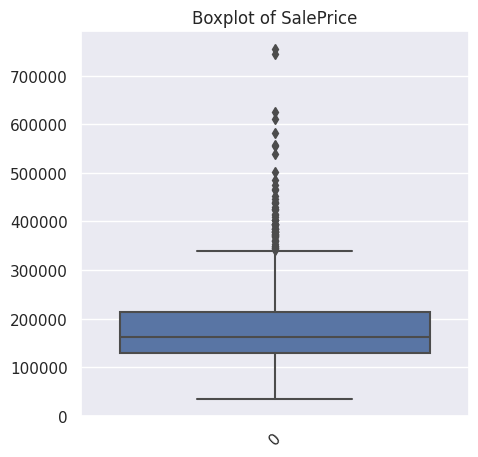

In [ ]:
# Plot a boxplot to examine the number of outliers
plt.figure(figsize=(5, 5))
sns.boxplot(df_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.xticks(rotation=45)
plt.show()

### Review the numerical features
After removing the ID column and SalePrice, there are 36 numerical features remaining in the dataset.

In [ ]:
# select only the numerical features
df_num = df.select_dtypes(include = ['float64', 'int64'])

# drop Id and SalePrice columns
df_num = df_num.drop('Id', axis=1)
df_num = df_num.drop('SalePrice', axis=1)

# print shape of dataset
shape = df_num.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

# show first 5 rows of data frame
df_num.head()

Shape of the dataframe (row, col): (2919, 36) 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


Among the 36 numerical features, 33 columns have no missing data, indicating that these features are complete for all rows. However, there are 11 features that contain missing values. Among them, LotFrontage has the highest number of missing data points, with 486 instances. LotFrontage represents the linear feet of street connected to property. It seems to be highly correlated with other features as well as shown in our correlation matrix below, so we will be removing it for our modeling.


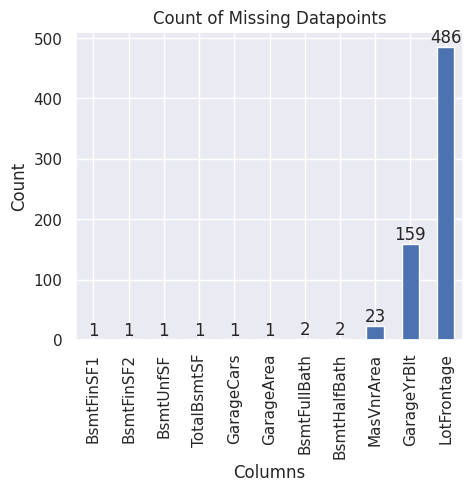

In [ ]:
# find and plot how many missing values each column has
missing = df_num.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize=(5, 4))
missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Missing Datapoints')

# Displaying the count of the bars above each bar
for i, v in enumerate(missing):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Looking at the numerical columns, many of the features are skewed to the right except features that represent the age of something. For example, YearBuilt is the number of years since the house was first built and that feature is skewed to the left. This suggests that there were a lot of recent developments and upgrades to housing in Aims near 2010, which is the last year we have data for. We are also only looking at houses sold from 2006 until 2010. This shows us that most likely, the data for each house was recently updated at the time of sales.


In [ ]:
#df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
# Statistics on years
print("The earliest house was built in {}, and the most recent house was built in {}.".format(min(df_train['YearBuilt']), max(df_train['YearBuilt'])))
print("They started adding a garage in {} up until {}.".format(min(df_train['GarageYrBlt']), max(df_train['GarageYrBlt'])))
print("They also started remodeling in {} up until {}.".format(min(df_train['YearRemodAdd']), max(df_train['YearRemodAdd'])))
print("The houses were sold from {} up until {}.".format(min(df_train['YrSold']), max(df_train['YrSold'])))

The earliest house was built in 1872, and the most recent house was built in 2010.
They started adding a garage in 1900.0 up until 2010.0.
They also started remodeling in 1950 up until 2010.
The houses were sold from 2006 up until 2010.


There are a few columns that quantify the quality and condition of the house.

In [ ]:
print("The average overall quality of the house is {} and ranges from {} to {}.".format(round(df_train['OverallQual'].mean(),2), min(df_train['OverallQual']),
                                                                                        max(df_train['OverallQual'])))
print("Similarly, the average overall condition of the house is {} and ranges from {} to {}.".format(round(df_train['OverallCond'].mean(),2),
                                                                                                     min(df_train['OverallCond']),
                                                                                                     max(df_train['OverallCond'])))

The average overall quality of the house is 6.1 and ranges from 1 to 10.
Similarly, the average overall condition of the house is 5.58 and ranges from 1 to 9.


There are also a few columns that look at different square footage of the house. For example, one that looks at the square footage of the garage area and another that looks at the square footage of the lot. These square footage columns are skewed to the right with most houses having a lower square footage, and then, there being outliers with a higher area. Looking at the box plot for Lot Area, it is clear that there are a significant number of outliers for this column.

Text(0.5, 1.0, 'Size of garage in square feet')

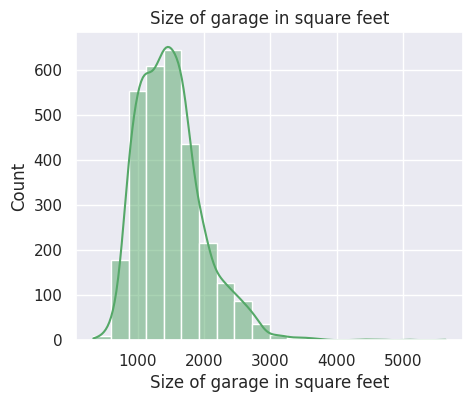

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(df['GrLivArea'], bins=20, kde=True, color='g')
plt.xlabel('Size of garage in square feet')
plt.ylabel('Count')
plt.title('Size of garage in square feet')

Text(0.5, 1.0, 'Size of lot in square feet')

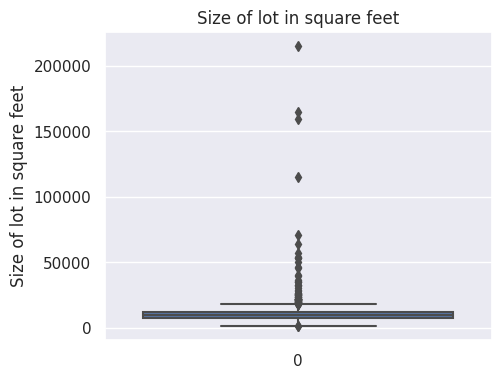

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(df_train['LotArea'])
plt.ylabel('Size of lot in square feet')
plt.title('Size of lot in square feet')

When looking at the correlation matrix, there are quite a few variables that have a high correlation with the Log of SalePrice. The highest correlation is 0.82 with `OverallQual`, which represents the overall material and finish quality. It makes sense that a higher finish quality would correlate with a higher Sale Price. The other features that have a correlation greater than 0.5 with the Log of SalePrice include YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GRLivArea, FullBath, TotRmsAbvGrd, GarageYrBlt, GarageCars, and GarageArea.

However, it does look like `OverallQual` is also highly correlated with many other predictor variables, this could lead to a problem known as multicollinearity. Since we are planning to use machine learning algorithms (like decision trees, random forests, gradient boosting), multicollinearity is less of an issue for these models. These algorithms can handle highly correlated features without much performance decrease. In fact, in some cases, including all the features might even help the model. Therefore, we will keep all the features for now.

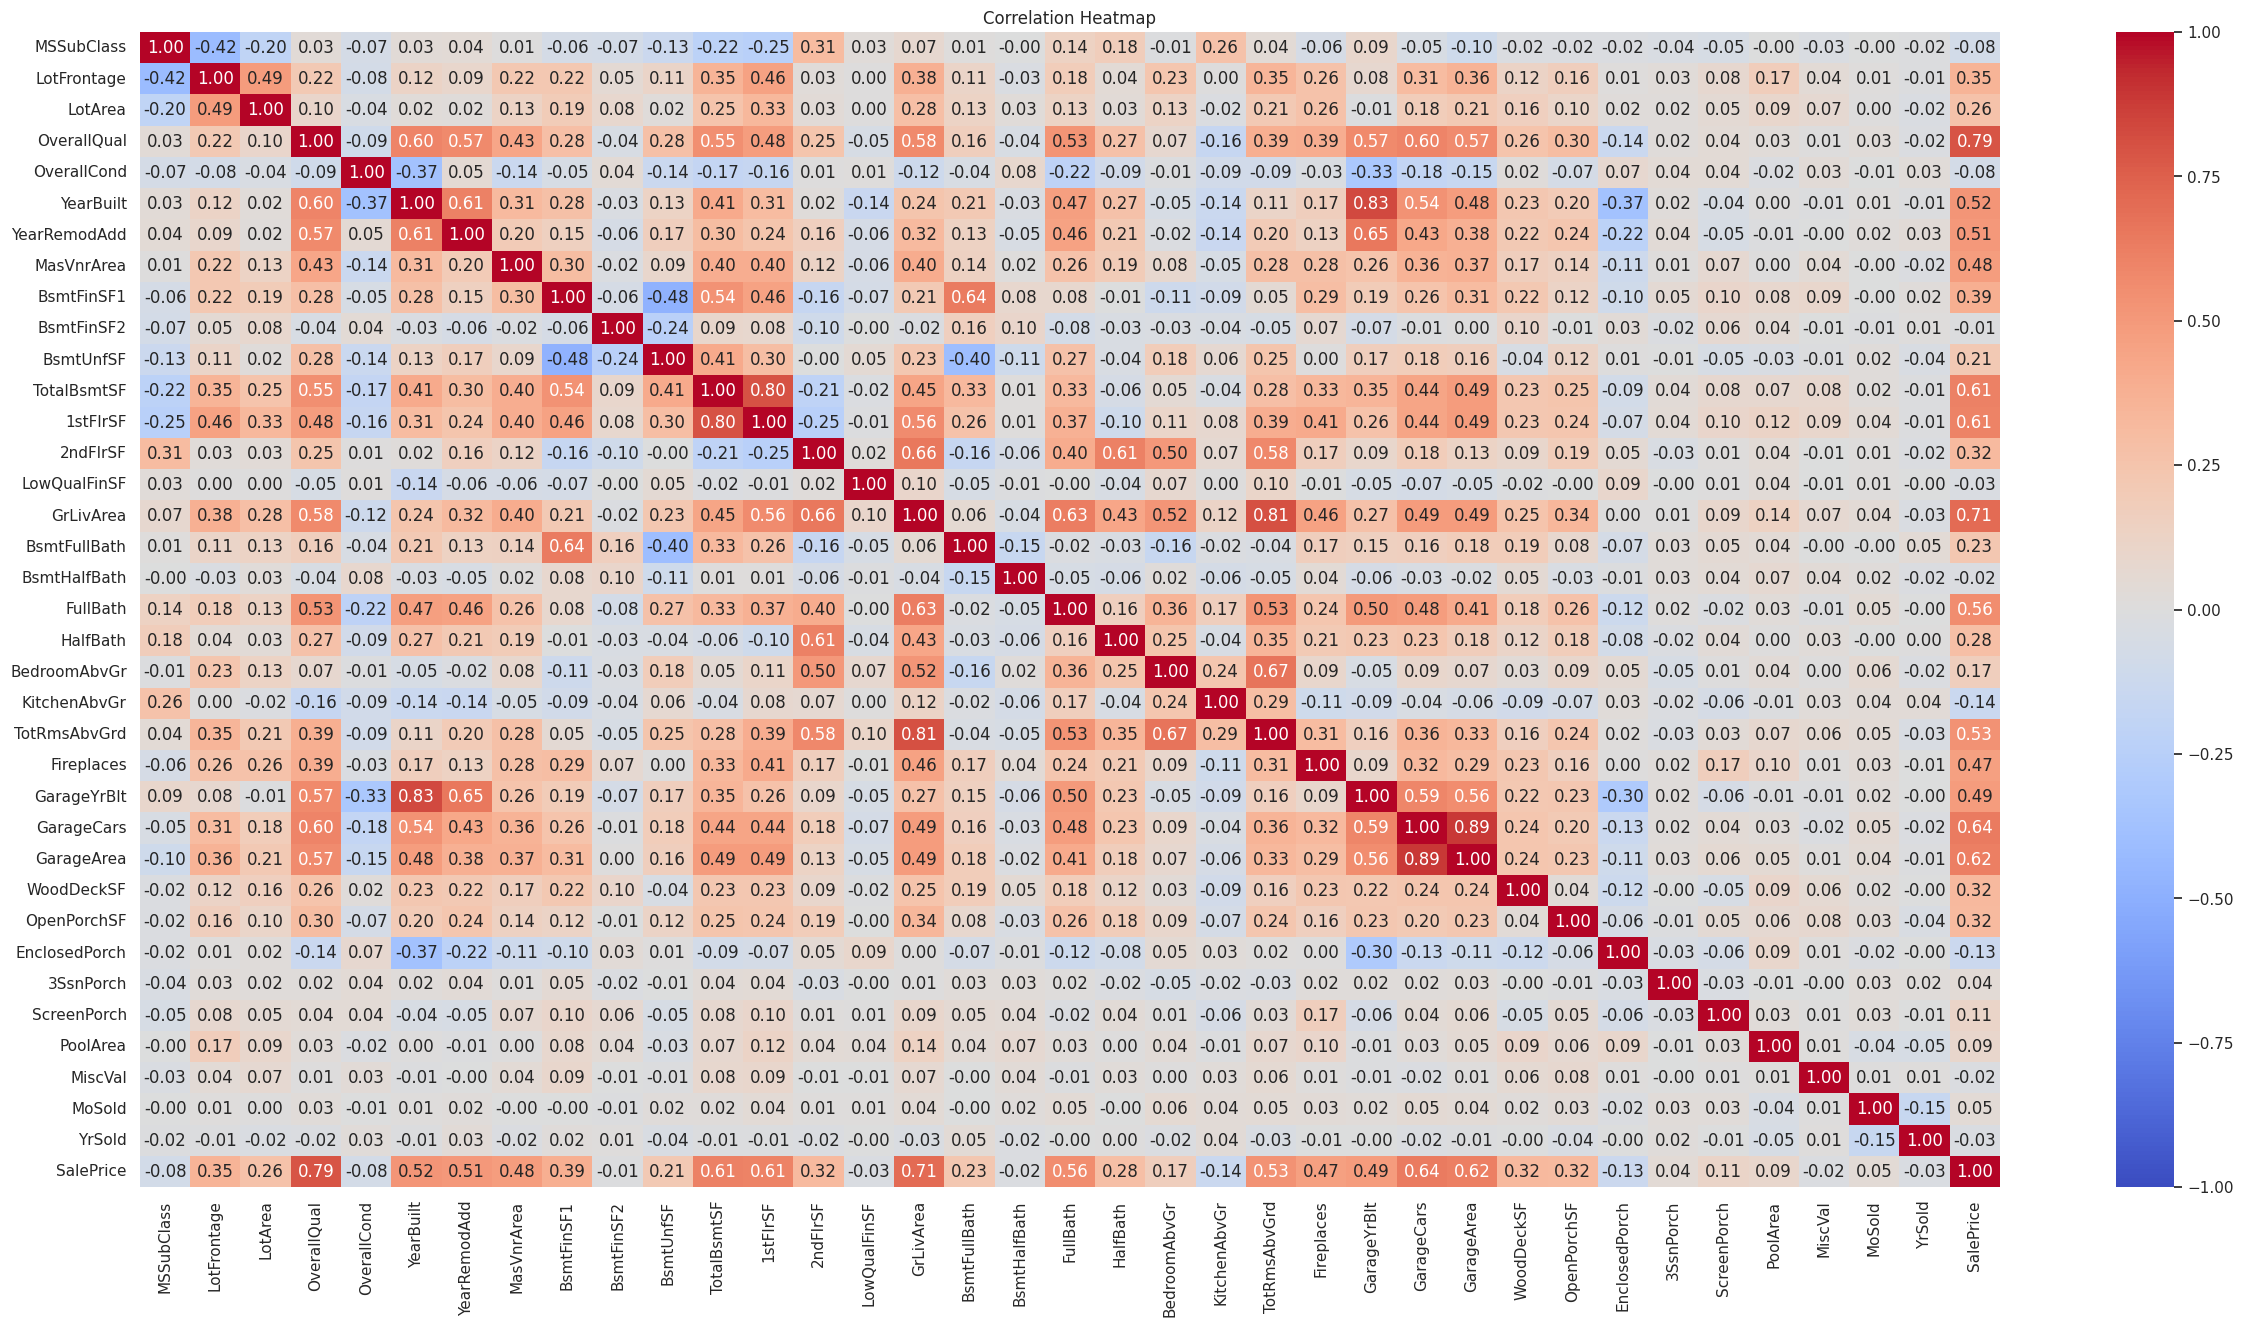

In [ ]:
# select only the numerical features
df_num_target = df.select_dtypes(include = ['float64', 'int64'])

# drop Id
df_num_target = df_num_target.drop('Id', axis=1)

# Correlation matrix
corr_matrix = df_num_target.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Review the categorical features
In the dataset, there are 43 categorical features.


In [ ]:
# select only the numerical features
df_cat = df.select_dtypes(include = ['object'])

# print shape of dataset
shape = df_cat.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

# show first 5 rows of data frame
df_cat.head()

Shape of the dataframe (row, col): (2919, 43) 



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


When we look at the missing values, we can see that there are 5 categorical fields that have a lot of missing values. `FireplaceQu` is the lowest in this category with 1420 missing values out of 2919. That represents roughly 49% of the data. Since there are so many missing values for these 5 features and since they don't seem crtical to understanding a house's value, we will be removing them from the dataset before conducting our modeling analysis.

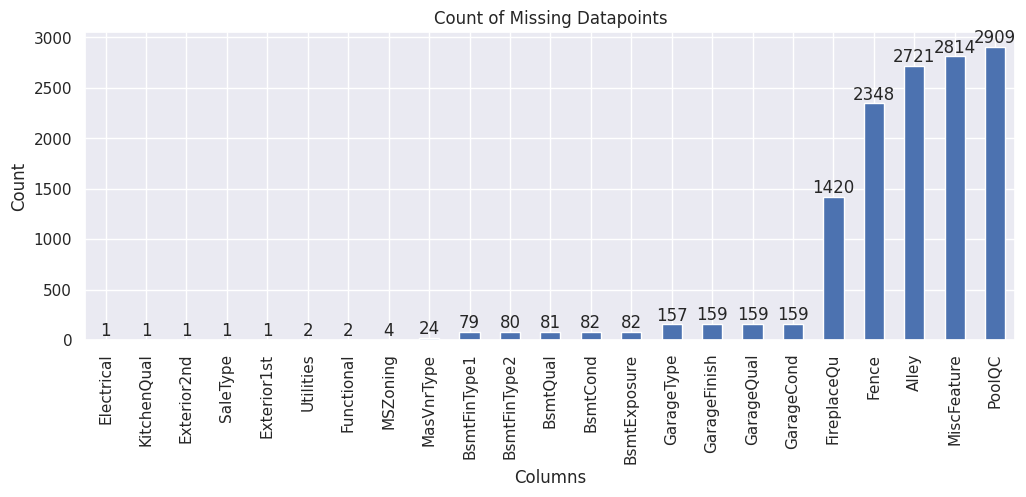

In [ ]:
# find and plot how many missing values each column has
missing = df_cat.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize=(12, 4))
missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Missing Datapoints')

# Displaying the count of the bars above each bar
for i, v in enumerate(missing):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

During our data exploration, we noticed that there were a lot of ordinal (ordered) categorical features. For example, for Exterior Quality which represents the quality of the exterior material. There are 5 differenct cateogries: Ex	(Excellent), Gd	(Good), TA (Average/Typical), Fa (Fair), Po (Poor).  Since the order of these values provide valuable information, we will make sure to encode the order in the next section.

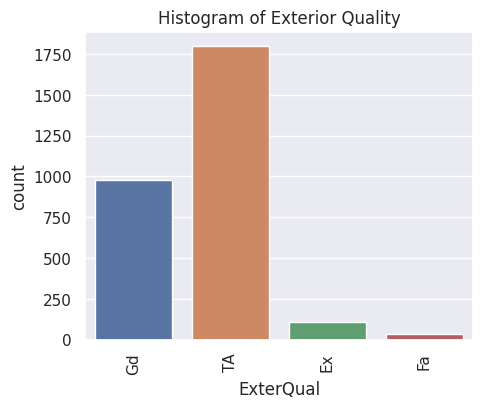

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='ExterQual')
plt.title(f'Histogram of Exterior Quality')
plt.xticks(rotation=90)
plt.show()

## Section 3: Data preparation

Since lot LotFrontage has a high number of missing values and seems to be correlated with other features, it doesn't seem to provide enough information to be considered in our model. Thus, we have decided to remove it before preparing our model. We also decided to drop the categorical columns with more than 49% of missing values.

In [ ]:
# drop numerical feature with a lot of missing values
df = df.drop('LotFrontage', axis=1)

# drop categorical features with a lot of missing values
df = df.drop('FireplaceQu', axis=1)
df = df.drop('Fence', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('PoolQC', axis=1)

Column names beginning with numbers can be difficult to work with, so we will update these column names to make it easier.

In [ ]:
# update column names that start with numbers
df.rename(columns={
    "1stFlrSF": "FirstFlrSF",
    "2ndFlrSF": "SecondFlrSF",
    "3SsnPorch": "Threeseasonporch",
}, inplace=True,
)

In our data, there are both nominal and ordinal categories. After reviewing the data dictionary, we grouped each categorical variable into the appropriate category. The nominal features are converted to categorical type. The ordinal features are also converted to categorical type but with an order specified.

Note: The `MSSubClass` feature is read as an integer type, but it is actually a nominal categorical feature.

In [ ]:
# The nominal categorical features
features_nom = ["MSSubClass", "MSZoning", "Street", "LandContour",
                "LotConfig", "Neighborhood", "Condition1", "Condition2",
                "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
                "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir",
                "GarageType", "SaleType", "SaleCondition"]


# The ordinal (ordered) categorical features
five_levels = ["Po", "Fa", "TA", "Gd", "Ex"]
ten_levels = list(range(10))
ordered_levels = {
    "OverallQual": ten_levels,
    "OverallCond": ten_levels,
    "ExterQual": five_levels,
    "ExterCond": five_levels,
    "BsmtQual": five_levels,
    "BsmtCond": five_levels,
    "HeatingQC": five_levels,
    "KitchenQual": five_levels,
    "GarageQual": five_levels,
    "GarageCond": five_levels,
    "LotShape": ["Reg", "IR1", "IR2", "IR3"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Functional": ["Sal", "Sev", "Maj1", "Maj2", "Mod", "Min2", "Min1", "Typ"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "PavedDrive": ["N", "P", "Y"],
    "Utilities": ["NoSeWa", "NoSewr", "AllPub"],
    "CentralAir": ["N", "Y"],
    "Electrical": ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"]
}

# Nominal categories
for name in features_nom:
  df[name] = df[name].astype("category")

# Ordinal categories
for name, levels in ordered_levels.items():
  df[name] = df[name].astype(CategoricalDtype(levels, ordered=True))

# Assign the code to the categories
for name in ordered_levels.keys():
    df[name] = df[name].cat.codes

## Section 4: Feature engineering
Since 'SalePrice' has a lot of skewness, we will apply a logarithmic transformation to mitigate the impact of outliers. Since the data is right-skewed, there are a small number of exceptionally high values that pull the mean higher than the median and distort the distribution.

Such skewness can be problematic for many machine learning models, as they assume that the input variables have a normal or Gaussian distribution. Outliers or extreme values can significantly affect the model's performance by causing it to be overfitted to these exceptional cases, thereby generalizing poorly to new data.

A logarithmic transformation is a convenient means to reduce skewness. It works by reducing the impact of extreme values (outliers) and bringing them closer to the rest of the data, thereby making the data more normally distributed. This has the effect of spreading out the data that are clustered around lower values while compressing the data that are spread out at higher values. In other words, a log transformation tends to reduce the variability of data and make patterns more visible and easier to model.

So, by applying a log transformation to the 'SalePrice', we are making the data more amenable to analysis and modeling by standard machine learning techniques. This should improve the performance of our model and make its predictions more reliable.

By applying a logarithmic transformation, we can see that the variable is now normally distributed with outliers on both sides of the mean.

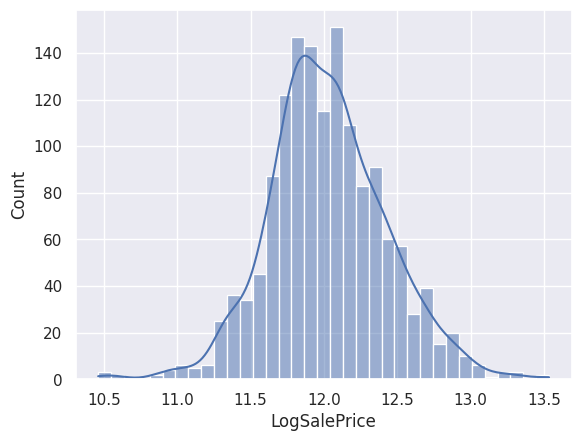

In [ ]:
# Apply log transformation
df['LogSalePrice'] = np.log(df['SalePrice'])

# Plot histogram to see the new distribution
sns.histplot(df['LogSalePrice'], kde=True)
plt.show()

Looking at the log(SalePrice), there are now only 28 outliers, which out of a total of 1460 observations represents approximately 1.9% of the data. Since this isn't a large proportion of the dataset and since we will likely use a machine learning model that is robust against outliers, such as tree-based methods (Random Forest, Gradient Boosting), we have decided to not remove these observations.

In [ ]:
# IQR method for outlier detection
Q1 = df['LogSalePrice'].quantile(0.25)
Q3 = df['LogSalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LogSalePrice'] < lower_bound) | (df['LogSalePrice'] > upper_bound)]

# Using len function
num_outliers = len(outliers)
print(f'The number of outliers is: {num_outliers}')

The number of outliers is: 28


For categorical columns, we will use a one-hot encoder and get dummy variables to cast as either 0 or 1. The data types would be 'uint8' but then transformed as an 'int' data type for modeling purposes as some models rejected objects as inputs. Machine learning algorithms cannot work with categorical data directly, and categories must be converted into numbers. This encoding helps to represent categorical data in a more expressive way that doesn't arbitrarily assign ranks to categories.  The parameter handle_unknown='ignore' tells the encoder to ignore and not raise an error on an unknown category that might be present during the transform (fit) step but is not seen during the training step.

In [ ]:
def one_hot_encode_categorical_columns(df):
    # Select only the categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    return df_encoded

In [ ]:
# perform the one-hot encode on categorical  columns
df_encode = one_hot_encode_categorical_columns(df)

# Find columns with data type 'uint8'
uint8_columns = df_encode.select_dtypes(include=['uint8']).columns.tolist()

# Convert uint8 columns to integer type
df_encode[uint8_columns] = df_encode[uint8_columns].astype(int)

# Find columns with data type 'uint8'
int8_columns = df_encode.select_dtypes(include=['int8']).columns.tolist()

# Convert int8 columns to integer type
df_encode[int8_columns] = df_encode[int8_columns].astype(int)

For numerical columns, we will use an an imputer to fill in missing values (NaNs) with the median, so for each column of the data, it will replace the missing values with the median value of that column.


In [ ]:
# Determine numerical and categorical columns
numerical_columns = df_encode.select_dtypes(include=[float, int]).columns.tolist()
categorical_columns = df_encode.select_dtypes(include=[object, bool]).columns.tolist()

# Impute missing values for numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
df_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(df_encode[numerical_columns]), columns=numerical_columns)

# Create new imputed dataset
df_imputed = pd.concat([df_numerical_imputed], axis=1)

In [ ]:
df_imputed.shape

(2919, 225)

## Section 5: Feature Selection

### Upload the Feature Selection Results from the Previous Modle

In this section we consolidate our training sets to the features that had the most significance to our training models. In the prior models with that included all features after feature engineering, we ran our base models without fine-tuning and ranked the feature importances after training each model. Below, we loaded the dataframe created from the previous colab notebook and scaled each model's feature importances between 0 and 1. Finally, we aggregated each features values to a single composite score named **'Score'**. The top features were then ranked based on highest scores. For our final model, we consolidated our training set to only have the **top 10** features from this list. Prior Models were the **top 50** and **top 25**.

Not only has our Test Scores increased but the training time has decreased significantly over each reduction.

#### Providing The top 10 Features from composite feature importance scores

Based on our Feature Importance Analysis from our Base Models, our top 10 features are:


*   **GrLivArea** :  Above grade (ground) living area square feet

* **TotalBsmtSF** : Total square feet of basement area

* **YearBuilt** : Original construction date

* **GarageArea** : Size of garage in square feet

* **ExterQual** :  Evaluates the quality of the material on the exterior

* **FirstFlrSF** : First Floor square feet

* **GarageCars** : Size of garage in square feet

* **LotArea** : Lot size in square feet
* **GarageYrBlt**: Year garage was built

* **Fireplaces** : Number of fireplaces


In [ ]:

downloaded = drive.CreateFile({'id':'1bcQA65grCytNaV5FE-uTy7nV-4mYpc18'}) # replace the id with id of file you want to access
downloaded.GetContentFile('FeatureImportance.csv')


# read the Feature Importance CSV
# import into the dataframe
feat_import = pd.read_csv('FeatureImportance.csv')
shape = feat_import.shape

print("Top 10 Composite Scores for Feature Importance")
print("Shape of the dataframe (row, col):",shape,"\r\n")
# confirm the data is imported
# Confirm the data is imported
feat_import_renamed = feat_import.head(10).drop('index', axis=1)
feat_import_renamed = feat_import_renamed.round(3)  # Round values to 3 decimal places
feat_import_renamed = feat_import_renamed.rename(columns={'Unnamed: 0': 'Feature'})

feat_import_renamed

Top 10 Composite Scores for Feature Importance
Shape of the dataframe (row, col): (50, 8) 



,Features,Decision Tree,Light GBM,Xgboost,Ridge,Gradient Boost,Score
0,GrLivArea,1.000,0.921,0.424,0.911,1.000,4.256
1,TotalBsmtSF,0.221,0.998,0.656,0.533,0.797,3.205
2,YearBuilt,0.031,0.624,0.825,0.757,0.584,2.821
3,GarageArea,0.044,0.918,0.426,0.551,0.704,2.643
4,ExterQual_TA,0.313,0.061,1.000,0.460,0.579,2.414
5,FirstFlrSF,0.034,0.933,0.182,0.659,0.590,2.398
6,GarageCars,0.172,0.258,0.592,0.775,0.593,2.390
7,LotArea,0.039,1.000,0.163,0.535,0.329,2.066
8,GarageYrBlt,0.053,0.511,0.282,0.473,0.738,2.057
9,Fireplaces,0.004,0.217,0.695,0.676,0.416,2.008


#### Filter for the Top 10 Features into our DataFrame

In [ ]:
top10_plus_target = ['Id','SalePrice','LogSalePrice','GrLivArea','TotalBsmtSF','YearBuilt','GarageArea','ExterQual','FirstFlrSF','GarageCars','LotArea','GarageYrBlt','Fireplaces']

In [ ]:
df_clean = df_imputed[top10_plus_target]
df_clean.head()
print("Shape: ", df_clean.shape)

Shape:  (2919, 13)


### Train / Validation/ Test Split

We drop the 'Id', 'SalePrice', and 'LogSalePrice' from the features dataset and will the test on the 'LogSalePrice'.

In [ ]:
# Define your features and target variable
features = df_clean.drop(['Id','SalePrice','LogSalePrice'], axis=1)  # Assuming 'target_variable' is the name of your target column
#features_train
target = df_clean['LogSalePrice']
#target = df_imputed['SalePrice']

There will be a split between row 1459 onward to separate the Train Data and the Test Data. The reason for this is due to us pre-processing the data in the prior steps. We need to split the data here as the Test Data does not have a Target 'SalesPrice' value. Test data will then be used later for our Model deployment test

In [ ]:
# Define the row index to split at
split_row = 1460  # Adjust this value to your desired split point

# Split the data into train and test subsets
features_train = features[:split_row]
target_train = target[:split_row]

features_test = features[split_row:]
target_test = target[split_row:]

# Print the shape of each subset
print("Training subset:")
print("Features shape:", features_train.shape)
print("Target shape:", target_train.shape)
print()

print("Testing subset:")
print("Features shape:", features_test.shape)
print("Target shape:", target_test.shape," +Target Values Here are N/A and should be dropped later")

Training subset:
Features shape: (1460, 10)
Target shape: (1460,)

Testing subset:
Features shape: (1459, 10)
Target shape: (1459,)  +Target Values Here are N/A and should be dropped later


In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)
X_test =features_test
print('X-Val Shape: ',X_val.shape,'\n',
      'X-Train Shape: ',X_train.shape,'\n',
      'y-Val Shape: ',y_val.shape,'\n',
      'y-Train Shape: ',y_train.shape)

X-Val Shape:  (292, 10) 
 X-Train Shape:  (1168, 10) 
 y-Val Shape:  (292,) 
 y-Train Shape:  (1168,)


### Exporting to Train/Validation split to CSV

In this step, we will export our Training/Validation/Test Splits to CSV and upload it to our google colab drive. This step will allow us to load our Training and Test Sets quickly for new models.

In [ ]:
# Grab the feature names
#feature_names = features.columns

In [ ]:
# Create DataFrames from the train and test data
#train_data = pd.DataFrame(X_train, columns=feature_names)
#train_data['target'] = y_train
#test_val = pd.DataFrame(X_val, columns=feature_names)
#test_val['target'] = y_val


#### Export Train/Val/Test to Google Drive **| We will comment this out to prevent saving over our splits.**

In [ ]:
## Export train and test data to CSV
#train_data.to_csv('train_data.csv', index=False)
#test_val.to_csv('test_val.csv', index=False)

# Specify the folder ID where you want to upload the files
#folder_id = '1O1czzZ6nnZZCxul4Zwk46MqsoD7AmB4c'

# Upload train data to Google Drive
#train_file = drive.CreateFile({'title': 'train_data.csv', 'parents': [{'id': folder_id}]})
#train_file.SetContentFile('train_data.csv')
#train_file.Upload()

# Upload test data to Google Drive
#test_file = drive.CreateFile({'title': 'test_val.csv','parents': [{'id': folder_id}]})
#test_file.SetContentFile('test_val.csv')
#test_file.Upload()"""

"# Export train and test data to CSV\ntrain_data.to_csv('train_data.csv', index=False)\ntest_val.to_csv('test_val.csv', index=False)\n\n# Specify the folder ID where you want to upload the files\nfolder_id = '1O1czzZ6nnZZCxul4Zwk46MqsoD7AmB4c'\n\n# Upload train data to Google Drive\ntrain_file = drive.CreateFile({'title': 'train_data.csv', 'parents': [{'id': folder_id}]})\ntrain_file.SetContentFile('train_data.csv')\ntrain_file.Upload()\n\n# Upload test data to Google Drive\ntest_file = drive.CreateFile({'title': 'test_val.csv','parents': [{'id': folder_id}]})\ntest_file.SetContentFile('test_val.csv')\ntest_file.Upload()"

### Create a feature Importance Dataframe

We will append feature importance scores for each model here

In [ ]:
feature_importance_df = pd.DataFrame({'Features':feature_names})
feature_importance_df.head()

,Features
0,GrLivArea
1,TotalBsmtSF
2,YearBuilt
3,GarageArea
4,ExterQual


## Models

Our model persisted on focusing on many models rather than focusing on one.

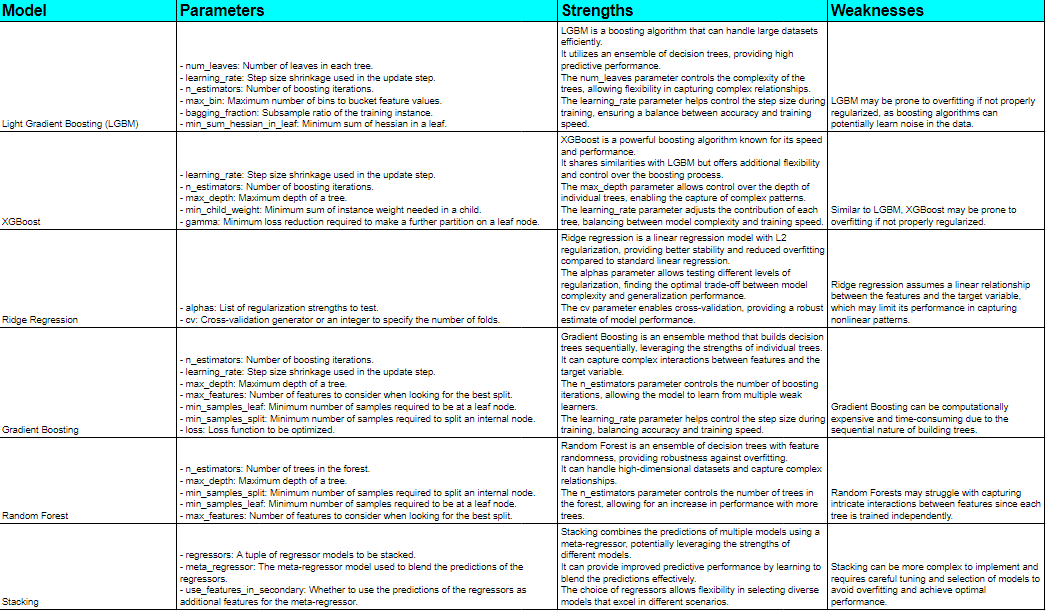

####  Setup cross validation and define error metrics

In [ ]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

#### Model Setup

In [ ]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression',
                       num_leaves=6,
                       learning_rate=0.01,
                       n_estimators=7000,
                       max_bin=200,
                       bagging_fraction=0.8,
                       bagging_freq=4,
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42,
                       enable_categorical = False)


# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
#ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))
ridge = Pipeline([('scaler', RobustScaler()), ('ridgecv', RidgeCV(alphas=ridge_alphas, cv=kf))])
# Support Vector Regressor
#svr = Pipeline([('scaler',RobustScaler()),('svr',SVR(kernel='linear',C= 20, epsilon= 0.008, gamma=0.0003))])

#svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
# Decision Tree Regressor
clf = tree.DecisionTreeRegressor()
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm,ridge, gbr, rf,clf), #took  svr out
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

#### Create Empty Dataframe to Append Results

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Mean CV Score', 'Test Score','Time'])
#results_df

### Model Training

#### Decision Tree Model ~ 0.0246

Cross-Validation RMSE Scores: [0.01439972 0.00601156 0.04663972 0.00776661 0.00808023]
Mean Cross-Validation RMSE: 0.016579569877428174
Test RMSE: 0.021597823102259165


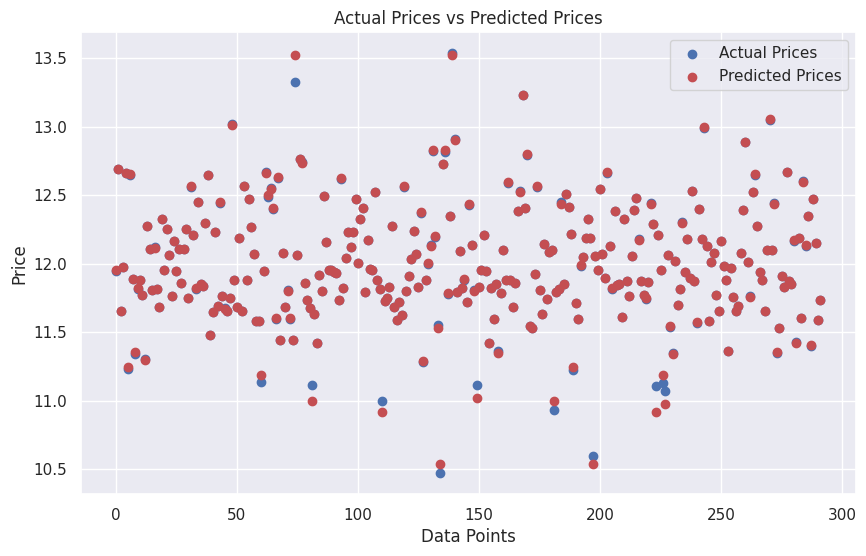

Execution Time: 0.474417


In [ ]:
# Start time
start_time = datetime.datetime.now()


#Building the Decision Tree
model_name = 'Decision Tree'
clf = tree.DecisionTreeRegressor() # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer

# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", scores)
print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = np.mean(scores)


# Make predictions on the test data
y_pred = clf.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("Test RMSE:", test_rmse)

# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)


#### LightGBM 0.718

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

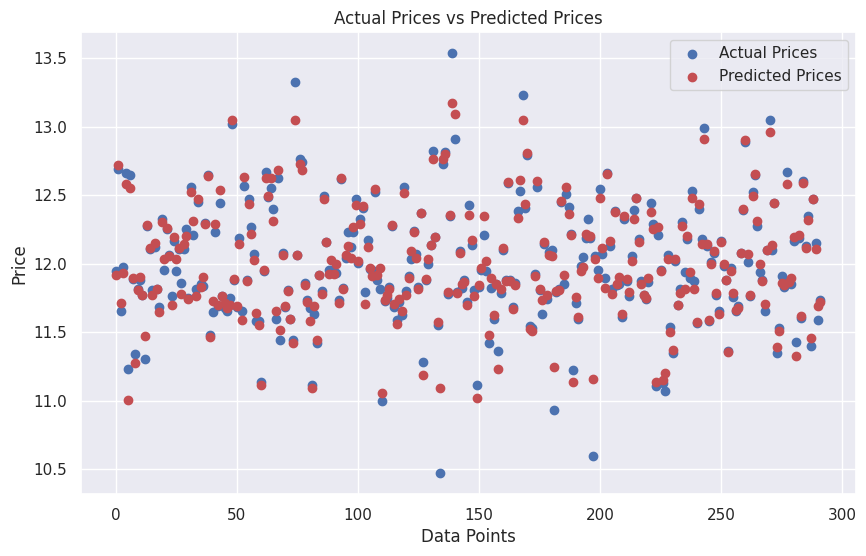

Execution Time: 14.1141


In [ ]:

# Start time
start_time = datetime.datetime.now()


#Building the LightGBM Model
model_name = 'LightGBM'
lightgbm.fit(X_train, y_train) # LightGBM

# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
scores = cross_val_score(lightgbm, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", scores)
print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = np.mean(scores)


# Make predictions on the test data
y_pred = lightgbm.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", test_rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)

#### XGBoost Regressor 0.729

Cross-Validation RMSE Scores: [0.06492741 0.05485154 0.09813828 0.05254649 0.04351353]
Mean Cross-Validation RMSE: 0.06279545002984051
RMSE: 0.07297057590400531


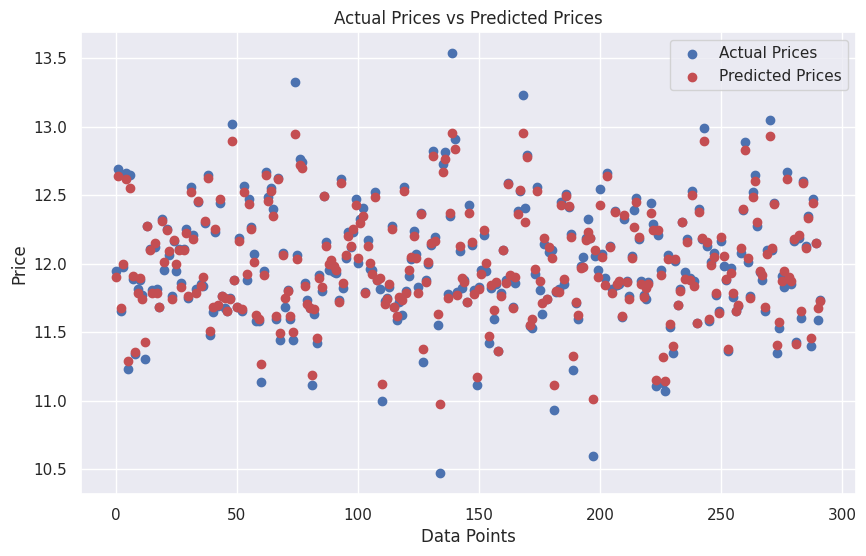

Execution Time: 39.166822


In [ ]:
# Start time
start_time = datetime.datetime.now()

#Building the Decision Tree
model_name = 'XGBoost'
# Fit the model on the training data
xgboost.fit(X_train, y_train)

# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
scores = cross_val_score(xgboost, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", scores)
print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = np.mean(scores)


# Make predictions on the test data
y_pred = xgboost.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", test_rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)

#### Ridge 0.0

Cross-Validation RMSE Scores: [3.67216582e-16 2.44136896e-15 2.04457540e-15 4.65492023e-16
 4.93728849e-16]
Mean Cross-Validation RMSE: 1.1624763623241471e-15
RMSE: 8.508954240093824e-16


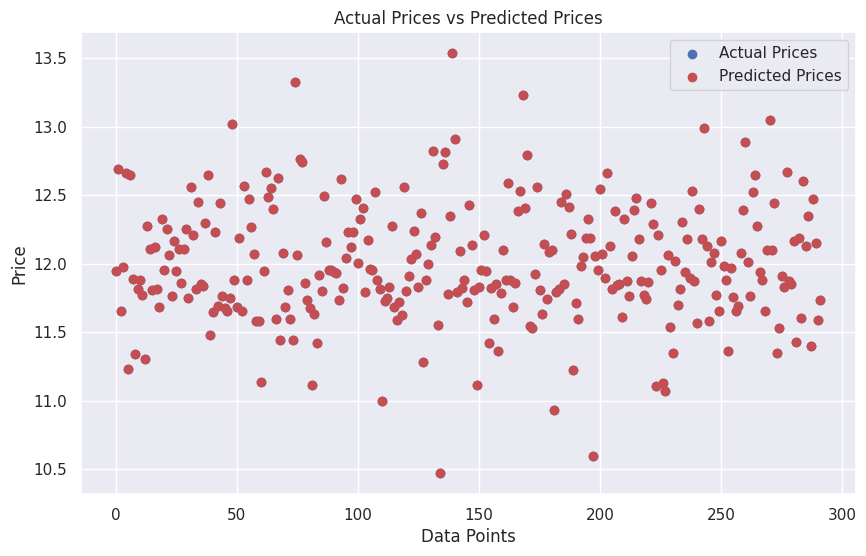

Execution Time: 5.38181


In [ ]:
# Start time
start_time = datetime.datetime.now()

#Building the Ridge Model
model_name = 'ridge'
# Fit the model on the training data
ridge.fit(X_train, y_train)



# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", scores)
print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = np.mean(scores)


# Make predictions on the test data
y_pred = ridge.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", test_rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)

#### Random Forest 0.039

Cross-Validation RMSE Scores: [0.03137651 0.02008371 0.04687773 0.01667365 0.00416535]
Mean Cross-Validation RMSE: 0.02383539003540139
RMSE: 0.03944899318391052


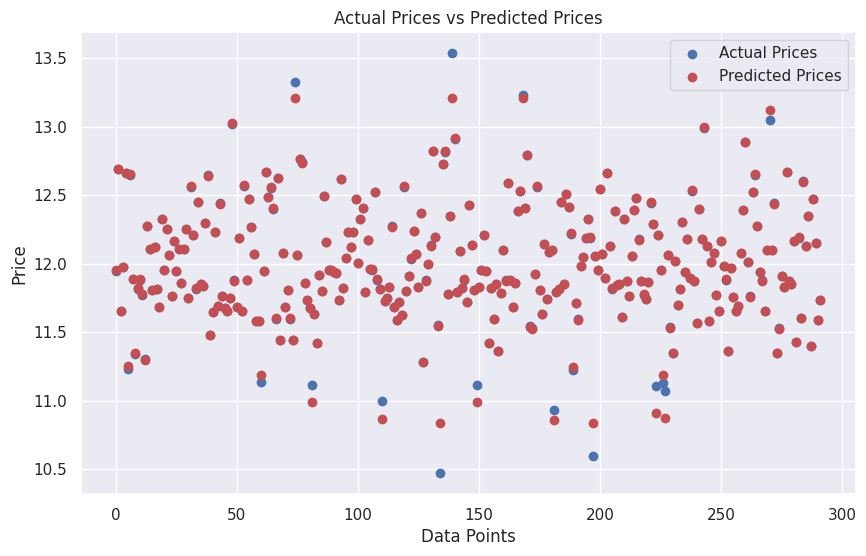

Execution Time: 32.609456


In [ ]:
#Building the RF Model
model_name = 'Random Forest'
# Fit the model on the training data
rf.fit(X_train, y_train)


# Start time
start_time = datetime.datetime.now()

# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", scores)
print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = np.mean(scores)


# Make predictions on the test data
y_pred = rf.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", test_rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)

#### Gradient Boost 0.0626

Cross-Validation RMSE Scores: [0.05007118 0.04743186 0.08668559 0.03645334 0.03168886]
Mean Cross-Validation RMSE: 0.050466166433638715
RMSE: 0.06260770404775519


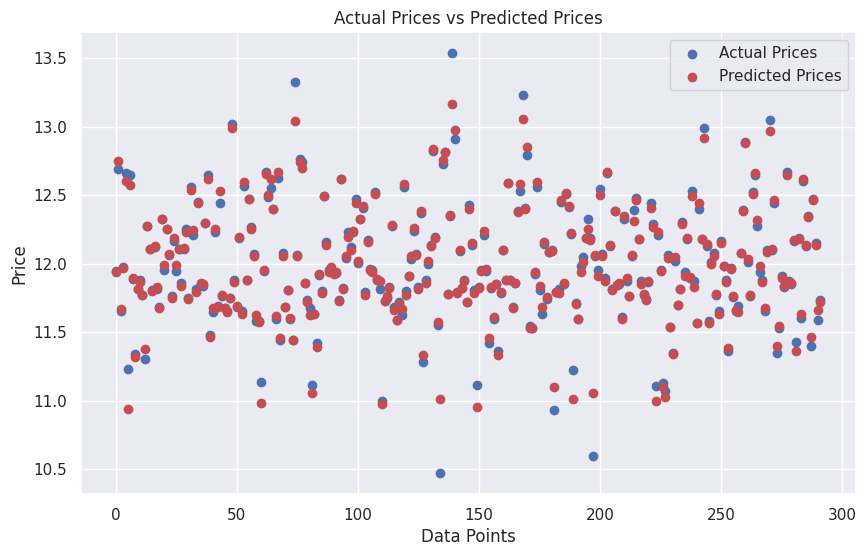

Execution Time: 198.483615


In [ ]:
# Start time
start_time = datetime.datetime.now()

#Building the Gradient Model
model_name = 'Gradient Boost'
# Fit the model on the training data
gbr.fit(X_train, y_train)

# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", scores)
print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = np.mean(scores)


# Make predictions on the test data
y_pred = gbr.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", test_rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)

#### Stacked Model 0.0662

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

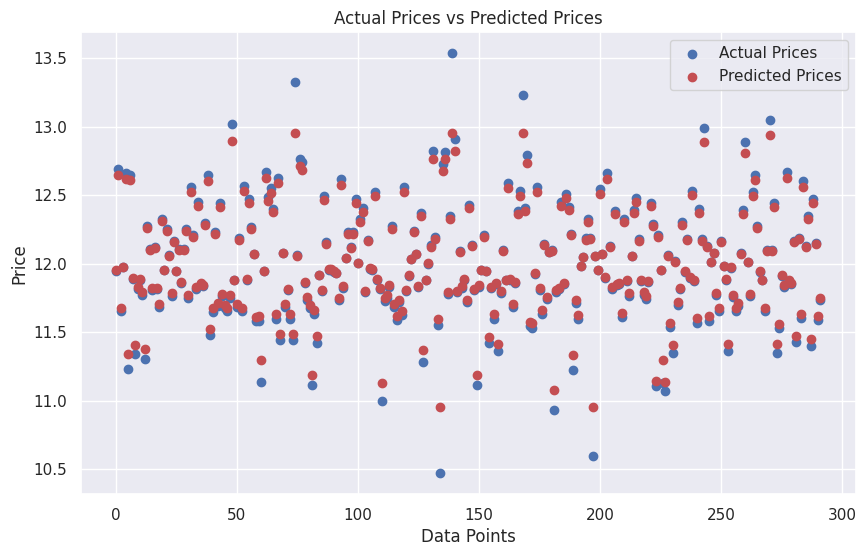

Execution Time: 325.432544


In [ ]:
# Start time
start_time = datetime.datetime.now()

#Building the Stacked Model
model_name = 'Stacked Model'
# Fit the model on the training data
stack_gen.fit(np.array(X_train), np.array(y_train))

# Define the RMSE scoring metric
scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation with RMSE scoring
#scores = cross_val_score(stack_gen, X_train, y_train, cv=5, scoring=scorer)

# Print the cross-validation scores
#print("Cross-Validation RMSE Scores:", scores)
#print("Mean Cross-Validation RMSE:", scores.mean())

# Convert the negative RMSE scores to positive
#scores = np.abs(scores)
# Calculate the mean RMSE
mean_rmse = 'NULL'


# Make predictions on the test data
y_pred = stack_gen.predict(X_val)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", test_rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()


# End time
end_time = datetime.datetime.now()

# Calculate the execution time
execution_time = end_time - start_time
execution_time = execution_time.total_seconds()

print("Execution Time:", execution_time)


# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Mean CV Score': mean_rmse,'Test Score': test_rmse,'Time':execution_time}, ignore_index=True)

## Results For All Models

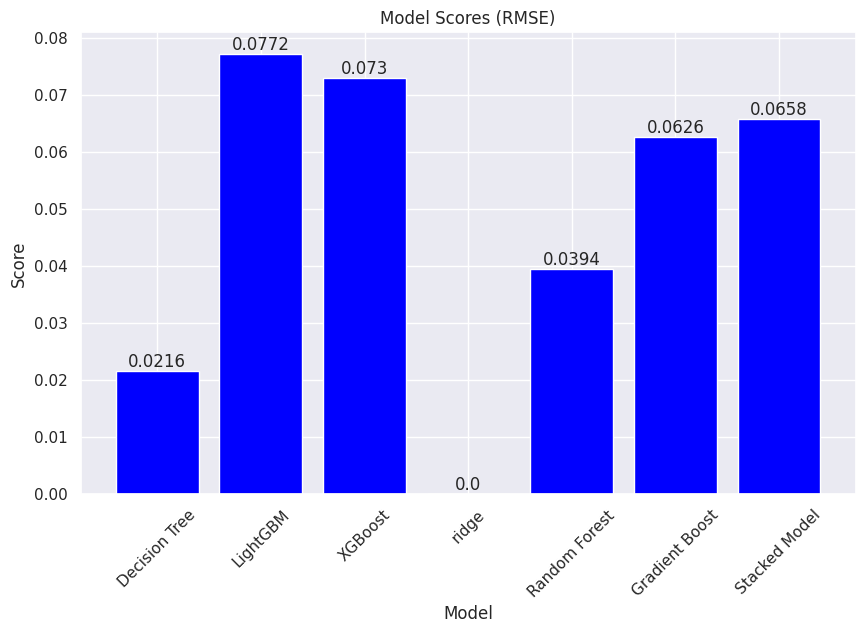

In [ ]:
# Create the bar chart
plt.figure(figsize=(10, 6))
bars =plt.bar(results_df['Model'], results_df['Test Score'], color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores (RMSE)')
plt.xticks(rotation=45)

# Display the score values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

0.25
# Display the chart
plt.show()

### Result Summary

In [ ]:
results_df


,Model,Mean CV Score,Test Score,Time
0,Decision Tree,0.01658,2.159782e-02,0.474417
1,LightGBM,0.067077,7.718218e-02,14.114100
2,XGBoost,0.062795,7.297058e-02,39.166822
3,ridge,0.0,8.508954e-16,5.381810
4,Random Forest,0.023835,3.944899e-02,32.609456
5,Gradient Boost,0.050466,6.260770e-02,198.483615
6,Stacked Model,NULL,6.583663e-02,298.619680


In [ ]:
#Prediction Analysis

predictions_df = pd.DataFrame({'Log Target': y_val, 'Log Predictions': y_pred})
predictions_df['Target'] = np.exp(predictions_df['Log Target'])
predictions_df['Prediction'] = np.exp(predictions_df['Log Predictions'])

predictions_df  = predictions_df.reset_index().drop(columns=['index'])


# Sort predictions_df by 'Target' column in ascending order
predictions_df = predictions_df.sort_values('Target')

# Reset the index
predictions_df = predictions_df.reset_index(drop=True)

predictions_df

,Log Target,Log Predictions,Target,Prediction
0,10.471950,10.953928,35311.0,57178.199219
1,10.596635,10.953928,40000.0,57178.199219
2,10.932982,11.082488,55993.0,65022.464844
3,11.002100,11.134939,60000.0,68523.992188
4,11.074421,11.138039,64500.0,68736.710938
...,...,...,...,...
287,13.021327,12.897700,451950.0,399392.656250
288,13.049793,12.934906,465000.0,414532.218750
289,13.229568,12.949341,556581.0,420559.312500
290,13.323927,12.949341,611657.0,420559.312500


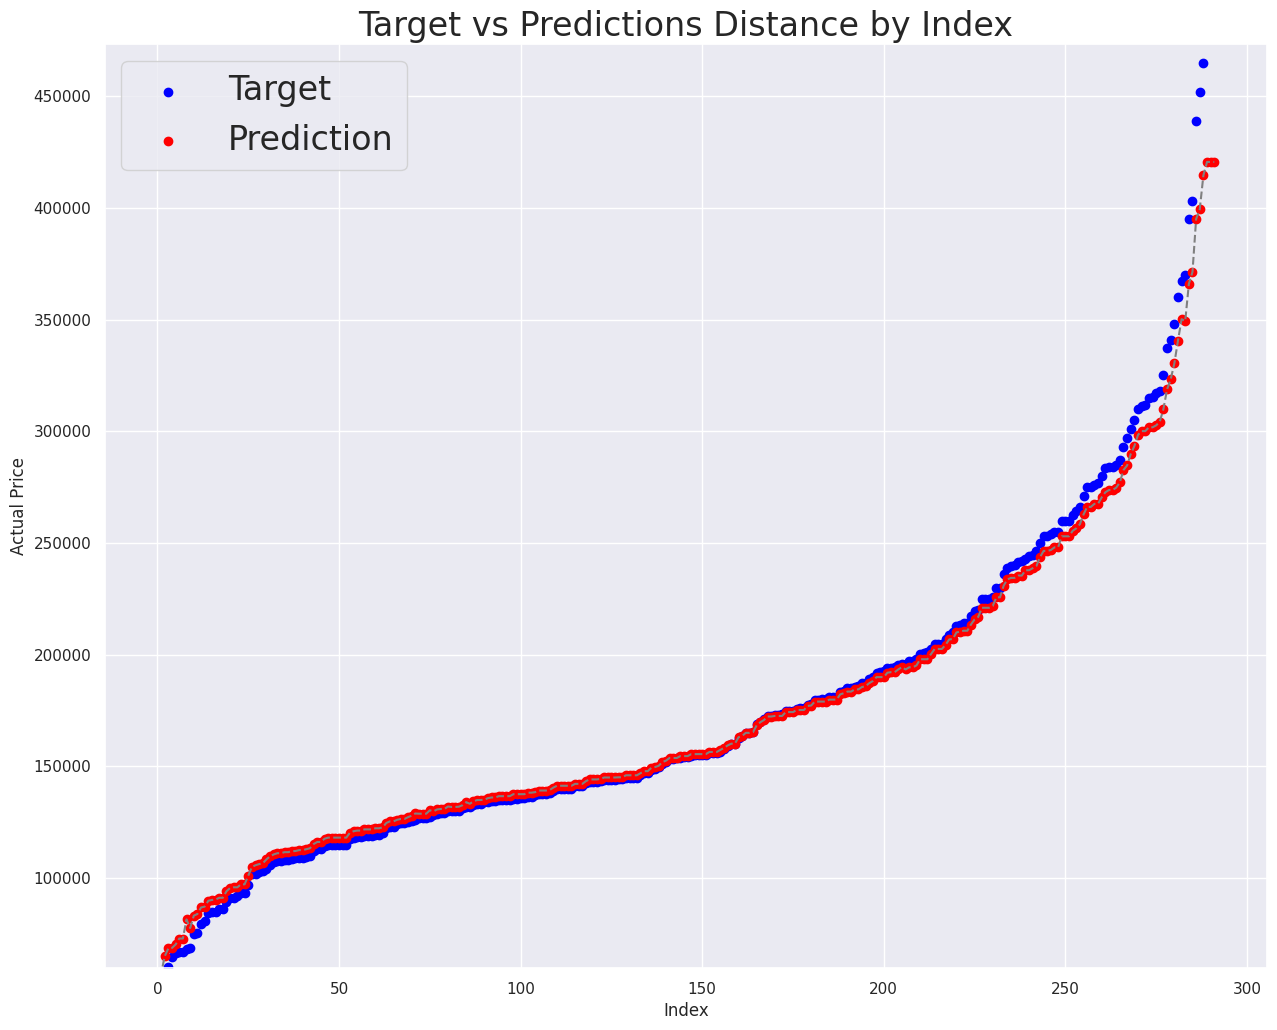

In [ ]:
# Example data
x = predictions_df.index
y1 = predictions_df['Target']
y2 = predictions_df['Prediction']

# Calculate the distance between the two variables
distance = np.abs(y1 - y2)

# Set figure size
plt.figure(figsize=(15, 12))  # Adjust the width and height as desired

# Create the scatter plot
plt.scatter(x, y1, color='blue', label='Target')
plt.scatter(x, y2, color='red', label='Prediction')

# Add a line representing the distance between y1 and y2
plt.plot(x, y2, linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Actual Price')
plt.title('Target vs Predictions Distance by Index', fontsize=24)  # Adjust the font size as desired

# Add a legend
plt.legend(fontsize=24)  # Adjust the font size of the legend as desired

# Remove outliers
plt.ylim(np.percentile(y1, 1), np.percentile(y1, 99))  # Adjust the percentile values as desired

# Display the plot
plt.show()

### Save the stacked model for reusability

In [ ]:
import pickle

# Assuming your trained model is stored in the 'stack_gen' variable
# Save the model parameters to a file
with open('model_parameters.pkl', 'wb') as f:
    pickle.dump(stack_gen, f)

In [ ]:
# Load the saved model parameters from a file
with open('model_parameters.pkl', 'rb') as f:
    stack_gen = pickle.load(f)

## Deployment

Ensure the model is working and provides an output. Using the Test Data

In [ ]:
#stack_gen.fit(np.array(X_train), np.array(y_train))


# Make predictions on the test data
y_pred = stack_gen.predict(X_test)


In [ ]:
Test_Predictions= X_test.copy()

Test_Predictions['Log Pred Price'] = y_pred
Test_Predictions['Prediction Price'] = np.exp(Test_Predictions['Log Pred Price'])
Test_Predictions.head()

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,ExterQual,FirstFlrSF,GarageCars,LotArea,GarageYrBlt,Fireplaces,Log Pred Price,Prediction Price
1460,896.0,882.0,1961.0,730.0,2.0,896.0,1.0,11622.0,1961.0,0.0,11.784522,131205.750000
1461,1329.0,1329.0,1958.0,312.0,2.0,1329.0,1.0,14267.0,1958.0,0.0,11.898100,146987.062500
1462,1629.0,928.0,1997.0,482.0,2.0,928.0,2.0,13830.0,1997.0,1.0,12.141760,187542.312500
1463,1604.0,926.0,1998.0,470.0,2.0,926.0,2.0,9978.0,1998.0,1.0,12.131621,185650.531250
1464,1280.0,1280.0,1992.0,506.0,3.0,1280.0,2.0,5005.0,1992.0,0.0,12.140644,187333.171875


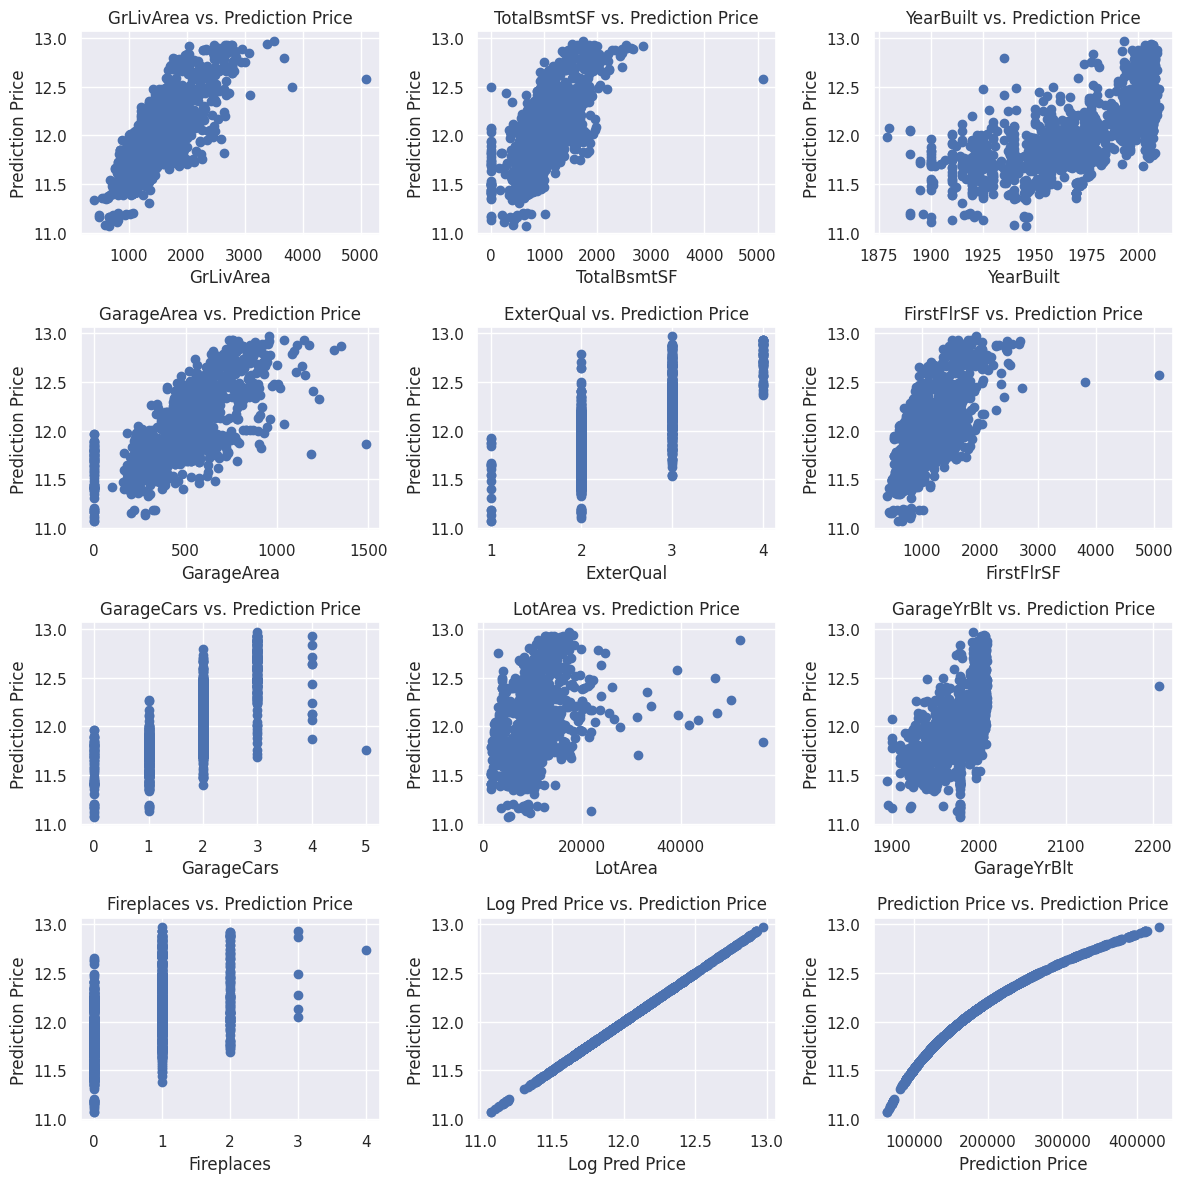

In [ ]:
# Create a figure and subplots with a 5 by 2 grid
fig, axs = plt.subplots(4, 3, figsize=(12, 12))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate through each column (excluding 'Pred Priction')
for i, column in enumerate(Test_Predictions.columns):
    if column != 'Pred Priction':
        # Set the current subplot
        ax = axs[i]

        # Create scatter plot
        ax.scatter(Test_Predictions[column], Test_Predictions['Log Pred Price'])

        # Set plot labels and title
        ax.set_xlabel(column)
        ax.set_ylabel('Prediction Price')
        ax.set_title(f'{column} vs. Prediction Price')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Discussion and conclusions
* Try different variations of the Stacked Model: Add more models/Change weights:
We can experiment with different variations of the stacked model. By adding more models to the stack, we can capture a wider range of patterns in our data, potentially improving the overall prediction accuracy. Additionally, we can adjust the weights assigned to each model's prediction to emphasize the predictions of certain models more than others, based on their performance or our domain-specific knowledge.

* In-depth feature engineering - Total Home Quality, Age, High Quality SF (Domain Knowledge):
We can consider specific features like Total Home Quality, Age, and High-Quality Square Footage. Drawing on our domain knowledge about the housing market, we can identify important variables and create derived features that capture valuable information. For example, we can create a composite feature called Total Home Quality that combines multiple quality-related attributes to provide a holistic measure of a home's quality.

* Utilize Hyperparameter Optimization to tune each model:
We can optimize the hyperparameters of each model to improve their performance. Hyperparameters play a crucial role in determining how models learn and generalize from the data. By utilizing techniques like grid search or randomized search, we can systematically explore different combinations of hyperparameters and find the optimal settings for each model. This fine-tuning process can enhance the performance of individual models as well as the overall stacked model.

* Test out different ML models or Deep Learning Techniques:
We can explore different machine learning models or even deep learning techniques. Each model has its own strengths and weaknesses and may perform better on specific aspects of our data. By testing out different models, we can identify the ones that are more suitable for our problem and potentially improve the overall prediction accuracy.

* Create better modularity for code processing and readability:
We can focus on creating better modularity in our codebase to improve code processing and readability.  Each module can handle a specific task or functionality, making it easier for us to develop, debug, and modify the code.

By considering these points and incorporating the suggested strategies, we can explore different variations of the stacked model, optimize feature engineering, fine-tune hyperparameters, experiment with different models, and enhance code modularity. These steps will lead to improved model performance, better insights, and increased efficiency in our project.
